<div style='color:#F6CC04; background-color: #1C2227; padding:20px; border-radius: 25px; text-align:center;'>
<h1> 
  Hubble and SN Data: 
</h1>

<h2 style='color: #e64a4a'> Version: Jan. 2017 </h2>
</div>

--- 


**Author:** Efrain Torres-Lomas

**Email:**  efrain@fisica.ugto.mx

**Date:**  Jan 20 2016


In [8]:
from cosmopystats.cosmomodels import CosmoModel
from cosmopystats.data.dataLoaders import get_unionSN21Data
from cosmopystats.utils import setup_text_plots, print_sign
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from itertools import cycle
import seaborn as sns
%matplotlib inline

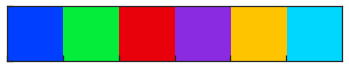

In [10]:
#sns.set()
sns.set_context('talk') # notebook, poster, talk, paper
sns.set_style('ticks',  # darkgrid, whitegrid, dark, white, ticks
              {'font.family': [u'sans-serif'],
                'font.serif': [u'Times New Roman'],
                'font.weight': [u'light'],  # does not work
                'xtick.direction': u'in',
                'ytick.direction': u'in',
               })
sns.set_palette("bright")  # deep, muted, pastel, bright, dark, and colorblind
sns.set_color_codes("bright")
sns.palplot(sns.color_palette("bright"))

In [3]:
# http://supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt
# dataSN: has the format: ['SN_Name', 'RedShift', 'Distance', 'DistanceErr', 'Prob'],
dataSN = get_unionSN21Data()

------------------------------
Number of SuperNova Loaded :580
------------------------------


In [4]:
H0 = 72.0

model1 = CosmoModel(pars={"OmegaM": [0.27, 0.0, 1.0, True],
                          "OmegaR": [0.0, 0.0, 0.0, False],
                          "OmegaL": [1.0 - 0.27, 0.0, 1.0, False],
                          "H0": [67.3, 50.0, 80.0, False]})
model2 = CosmoModel(pars={"OmegaM": [0.2, 0.0, 1.0, True],
                          "OmegaR": [0.0, 0.0, 0.0, False],
                          "OmegaL": [0.0, 0.0, 1.0, False],
                          "H0": [H0, 50.0, 80.0, False]})
model3 = CosmoModel(pars={"OmegaM": [1.0, 0.0, 1.0, True],
                          "OmegaR": [0.0, 0.0, 0.0, False],
                          "OmegaL": [0.0, 0.0, 1.0, False],
                          "H0": [H0, 50.0, 80.0, False]})

models = [model1, model2, model3]

#for model in models:
#    print model

In [13]:
# Color Version
lines = ["b--", "g-", "r-"]  # "g-", "k-", "y-", "c-", "r--", "b--", "m--", "g--", "k--", "y--", "c--"]
line_width = 2.0
# B&W version
#lines = ["k-", "k--", "k-.", "k:"]
#line_width = 1

linecycler = cycle(lines)

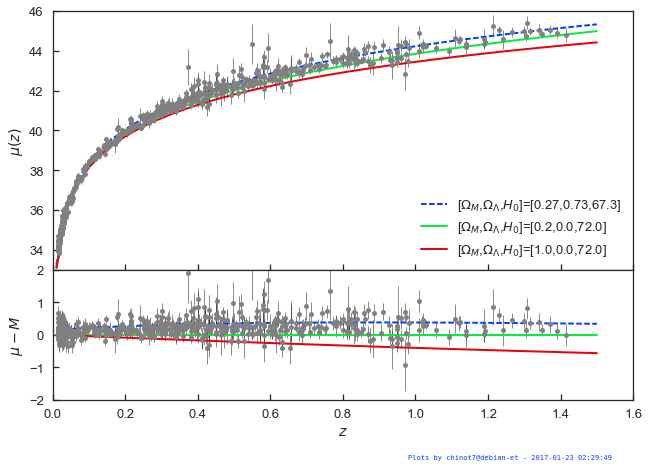

In [14]:
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
fig = plt.figure()
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
plt.subplots_adjust(hspace=.001)

zarray = np.linspace(0.01, 1.5, 50)

# plotHubbleDiagram
ax1.errorbar(dataSN['RedShift'], dataSN['Distance'], yerr=dataSN['DistanceErr'],
             fmt='o', ms=5, mfc='0.5', ecolor='0.1', elinewidth=-.5)

ax1.set_xlabel(r'$z$')
ax1.set_ylabel(r'$\mu(z)$')

# plotHubbleDiagram_rescaled
distance_res = [dataSN['Distance'][i] - model2.mu(dataSN['RedShift'][i]) for i in xrange(len(dataSN['RedShift']))]

ax2.errorbar(dataSN['RedShift'], distance_res, yerr=dataSN['DistanceErr'],
             fmt='o', ms=5, mfc='0.5', ecolor='0.1', elinewidth=-.5)

ax2.set_xlabel(r'$z$')
ax2.set_ylabel(r'$\mu-M$')

for model in models:
    ls = next(linecycler)

    mu = [model.mu(z) for z in zarray]
    mu_rescaled = [(model.mu(z)-model2.mu(z)) for z in zarray]

    ax1.plot(zarray, mu, ls, linewidth=line_width, label=model.plotLabel)
    ax2.plot(zarray, mu_rescaled, ls, linewidth=line_width)

ax1.legend(loc='lower right', fancybox=True)
ax1.set_xlabel('')
ax1.set_xlim(0, 1.6)
ax1.set_ylim(33, 46)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2.set_yticks(np.arange(-2, 3, 1))
ax2.set_xlim(0, 1.6)
ax2.set_ylim(-2, 2)

print_sign(fig)

plt.savefig('./plots/SuperNova_luminosity_2.pdf', dpi=90, bbox_inches='tight')

#plt.show()